In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv("ProjectTweets.csv",header = None)

In [3]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
columns_names=['index','id','date','flag','user','text']

In [5]:
df.columns = columns_names

In [6]:
# remove PDT 
df['date'] = df['date'].str.replace('PDT', '')

In [7]:
# time format
date_format = '%a %b %d %H:%M:%S %Y'

In [8]:
# column in object 
df['date'] = pd.to_datetime(df['date'], format=date_format)

In [9]:
# date objects
print(df['date'])

0         2009-04-06 22:19:45
1         2009-04-06 22:19:49
2         2009-04-06 22:19:53
3         2009-04-06 22:19:57
4         2009-04-06 22:19:57
                  ...        
1599995   2009-06-16 08:40:49
1599996   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:49
1599999   2009-06-16 08:40:50
Name: date, Length: 1600000, dtype: datetime64[ns]


In [10]:
df['date'].min()

Timestamp('2009-04-06 22:19:45')

In [11]:
df['date'].max()

Timestamp('2009-06-25 10:28:31')

In [12]:
df['week'] = df['date'].dt.strftime('%U')  # week



In [13]:
df['month'] = df['date'].dt.strftime('%B')  # month

In [14]:
df['day'] = df['date'].dt.strftime('%A')  # day

In [15]:
df['day_num'] = df['date'].dt.dayofyear


In [16]:
df.head()

,index,id,date,flag,user,text,week,month,day,day_num
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,96
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,96
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,96
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,96
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,96


In [17]:
import nltk

In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in df['text']:
    pol_score = sia.polarity_scores(line)
    pol_score['text'] = line
    results.append(pol_score)

In [20]:
df1 = pd.DataFrame.from_records(results)
df1.head()

,neg,neu,pos,compound,text
0,0.129,0.745,0.126,-0.0173,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0.303,0.697,0.000,-0.7500,is upset that he can't update his Facebook by ...
2,0.000,0.833,0.167,0.4939,@Kenichan I dived many times for the ball. Man...
3,0.321,0.500,0.179,-0.2500,my whole body feels itchy and like its on fire
4,0.241,0.759,0.000,-0.6597,"@nationwideclass no, it's not behaving at all...."


In [21]:
df1['label'] = 0
df1.loc[df1['compound'] > 0.2, 'label'] = 1
df1.loc[df1['compound'] < -0.2, 'label'] = -1
df1.head()

,neg,neu,pos,compound,text,label
0,0.129,0.745,0.126,-0.0173,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,0.303,0.697,0.000,-0.7500,is upset that he can't update his Facebook by ...,-1
2,0.000,0.833,0.167,0.4939,@Kenichan I dived many times for the ball. Man...,1
3,0.321,0.500,0.179,-0.2500,my whole body feels itchy and like its on fire,-1
4,0.241,0.759,0.000,-0.6597,"@nationwideclass no, it's not behaving at all....",-1


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

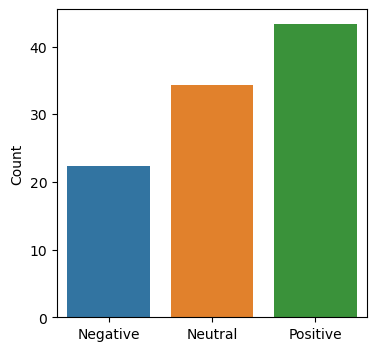

In [23]:
fig, ax = plt.subplots(figsize=(4, 4))

counts = df1.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Count")

plt.show()

In [24]:
merged_df = pd.merge(df, df1, on="text", how="inner")

In [25]:
merged_df.head()

,index,id,date,flag,user,text,week,month,day,day_num,neg,neu,pos,compound,label
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,96,0.129,0.745,0.126,-0.0173,0
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,96,0.303,0.697,0.000,-0.7500,-1
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,96,0.000,0.833,0.167,0.4939,1
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,96,0.321,0.500,0.179,-0.2500,-1
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,96,0.241,0.759,0.000,-0.6597,-1


In [26]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [27]:
merged_df['solo_data'] = merged_df['date'].dt.date

In [28]:
grouped_df_cat= merged_df.groupby('solo_data')['label'].apply(lambda x: x.mode().iloc[0]).reset_index()


In [29]:
grouped_df = merged_df.groupby('solo_data')['compound'].mean().reset_index()


In [30]:
grouped_df1 = pd.merge(grouped_df, grouped_df_cat, on="solo_data")

In [31]:
grouped_df1.head()

,solo_data,compound,label
0,2009-04-06,0.130866,0
1,2009-04-07,0.161898,1
2,2009-04-17,0.164737,1
3,2009-04-18,0.162668,1
4,2009-04-19,0.173257,1


In [32]:
grouped_df1['solo_data'] = pd.to_datetime(grouped_df1['solo_data'], format='%Y-%m-%d')

In [33]:
grouped_df1['day_num'] = grouped_df1['solo_data'].dt.dayofyear

In [34]:
grouped_df1 = grouped_df1[grouped_df1['solo_data'].dt.month >= 5]

In [35]:
plt.figure(figsize=(10, 6))  # chart


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

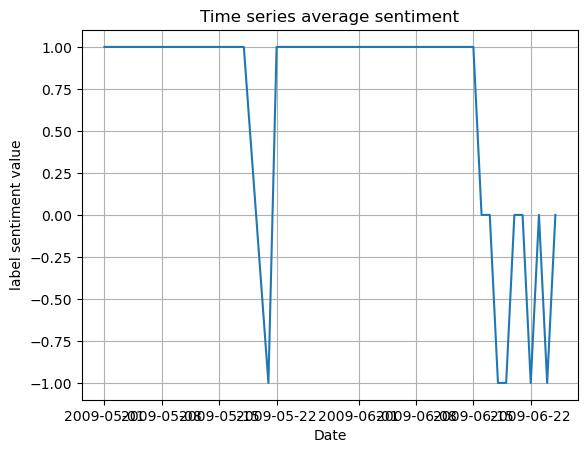

In [36]:
plt.plot(grouped_df1['solo_data'], grouped_df1['label'])  
plt.title('Time series average sentiment')  
plt.xlabel('Date')  
plt.ylabel('label sentiment value')  
plt.grid(True)  
plt.show()  

In [37]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

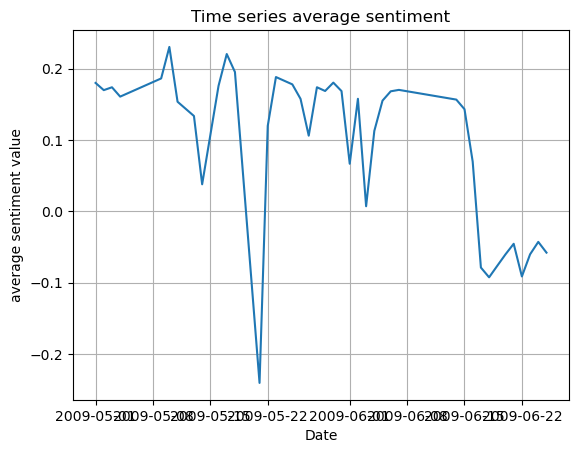

In [38]:
plt.plot(grouped_df1['solo_data'], grouped_df1['compound'])  
plt.title('Time series average sentiment')  
plt.xlabel('Date')  
plt.ylabel('average sentiment value')  
plt.grid(True)  
plt.show()  

In [39]:
from statsmodels.tsa.stattools import adfuller



# test ADF
result = adfuller(grouped_df1['compound'])

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]


if p_value < 0.05:
    print("time series is stationary (Ho rejected)")
else:
    print("time series is not stationary (H1 accepted)")


print(f'ADF Statistic: {adf_statistic}')
print(f'Critical Values: {critical_values}')


time series is stationary (Ho rejected)
ADF Statistic: -3.2197647015121365
Critical Values: {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}


In [40]:
test_set_start_index = len(grouped_df1) - 7

# split dataset into training and test set
train_set = grouped_df1.iloc[:test_set_start_index]
test_set = grouped_df1.iloc[test_set_start_index:]

In [41]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 41 to 47
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  7 non-null      datetime64[ns]
 1   compound   7 non-null      float64       
 2   label      7 non-null      int64         
 3   day_num    7 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 280.0 bytes


In [42]:
train_set.head(2)

,solo_data,compound,label,day_num
7,2009-05-01,0.180038,1,121
8,2009-05-02,0.169917,1,122


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [44]:
print(grouped_df1['compound'].dtype)


float64


In [45]:
import numpy as np
from scipy.interpolate import CubicSpline


In [46]:
dates = np.array(grouped_df1['solo_data'])  


In [47]:
values = np.array(grouped_df1['compound'])  

In [48]:
numeric_dates = np.arange(len(dates))


In [49]:
cubic_interp = CubicSpline(numeric_dates, values)


In [50]:
date_min = min(grouped_df1['solo_data'])
date_max = max(grouped_df1['solo_data'])

In [51]:
list_dates = grouped_df1['solo_data'].tolist()

In [52]:
from datetime import datetime, timedelta

delta = date_max - date_min

# Crea una lista di date nel periodo
date_list = [date_min + timedelta(days=i) for i in range(delta.days + 1)]

# Stampa la lista di date
print(date_list)


[Timestamp('2009-05-01 00:00:00'), Timestamp('2009-05-02 00:00:00'), Timestamp('2009-05-03 00:00:00'), Timestamp('2009-05-04 00:00:00'), Timestamp('2009-05-05 00:00:00'), Timestamp('2009-05-06 00:00:00'), Timestamp('2009-05-07 00:00:00'), Timestamp('2009-05-08 00:00:00'), Timestamp('2009-05-09 00:00:00'), Timestamp('2009-05-10 00:00:00'), Timestamp('2009-05-11 00:00:00'), Timestamp('2009-05-12 00:00:00'), Timestamp('2009-05-13 00:00:00'), Timestamp('2009-05-14 00:00:00'), Timestamp('2009-05-15 00:00:00'), Timestamp('2009-05-16 00:00:00'), Timestamp('2009-05-17 00:00:00'), Timestamp('2009-05-18 00:00:00'), Timestamp('2009-05-19 00:00:00'), Timestamp('2009-05-20 00:00:00'), Timestamp('2009-05-21 00:00:00'), Timestamp('2009-05-22 00:00:00'), Timestamp('2009-05-23 00:00:00'), Timestamp('2009-05-24 00:00:00'), Timestamp('2009-05-25 00:00:00'), Timestamp('2009-05-26 00:00:00'), Timestamp('2009-05-27 00:00:00'), Timestamp('2009-05-28 00:00:00'), Timestamp('2009-05-29 00:00:00'), Timestamp('20

In [53]:
list_dates

[Timestamp('2009-05-01 00:00:00'),
 Timestamp('2009-05-02 00:00:00'),
 Timestamp('2009-05-03 00:00:00'),
 Timestamp('2009-05-04 00:00:00'),
 Timestamp('2009-05-09 00:00:00'),
 Timestamp('2009-05-10 00:00:00'),
 Timestamp('2009-05-11 00:00:00'),
 Timestamp('2009-05-13 00:00:00'),
 Timestamp('2009-05-14 00:00:00'),
 Timestamp('2009-05-16 00:00:00'),
 Timestamp('2009-05-17 00:00:00'),
 Timestamp('2009-05-18 00:00:00'),
 Timestamp('2009-05-21 00:00:00'),
 Timestamp('2009-05-22 00:00:00'),
 Timestamp('2009-05-23 00:00:00'),
 Timestamp('2009-05-25 00:00:00'),
 Timestamp('2009-05-26 00:00:00'),
 Timestamp('2009-05-27 00:00:00'),
 Timestamp('2009-05-28 00:00:00'),
 Timestamp('2009-05-29 00:00:00'),
 Timestamp('2009-05-30 00:00:00'),
 Timestamp('2009-05-31 00:00:00'),
 Timestamp('2009-06-01 00:00:00'),
 Timestamp('2009-06-02 00:00:00'),
 Timestamp('2009-06-03 00:00:00'),
 Timestamp('2009-06-04 00:00:00'),
 Timestamp('2009-06-05 00:00:00'),
 Timestamp('2009-06-06 00:00:00'),
 Timestamp('2009-06-

In [54]:
valori_mancanti = list(set(date_list) - set(list_dates))

print(valori_mancanti)

[Timestamp('2009-05-20 00:00:00'), Timestamp('2009-05-06 00:00:00'), Timestamp('2009-06-11 00:00:00'), Timestamp('2009-06-09 00:00:00'), Timestamp('2009-05-08 00:00:00'), Timestamp('2009-05-07 00:00:00'), Timestamp('2009-05-24 00:00:00'), Timestamp('2009-05-19 00:00:00'), Timestamp('2009-06-12 00:00:00'), Timestamp('2009-05-15 00:00:00'), Timestamp('2009-06-10 00:00:00'), Timestamp('2009-06-08 00:00:00'), Timestamp('2009-06-13 00:00:00'), Timestamp('2009-05-05 00:00:00'), Timestamp('2009-05-12 00:00:00')]


In [55]:
df5 = pd.DataFrame({'solo_data': valori_mancanti})


In [56]:
df5['compound']= ' '

In [57]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  15 non-null     datetime64[ns]
 1   compound   15 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 368.0+ bytes


In [58]:
df5['solo_data'] = pd.to_datetime(df5['solo_data'])

In [59]:
df5 = df5.sort_values(by='solo_data')

In [60]:
grouped_df1

,solo_data,compound,label,day_num
7,2009-05-01,0.180038,1,121
8,2009-05-02,0.169917,1,122
9,2009-05-03,0.173946,1,123
10,2009-05-04,0.160835,1,124
11,2009-05-09,0.186334,1,129
12,2009-05-10,0.230544,1,130
13,2009-05-11,0.153647,1,131
14,2009-05-13,0.133649,1,133
15,2009-05-14,0.037866,1,134
16,2009-05-16,0.176022,1,136


In [61]:
df5['compound'].replace(' ', pd.NA, inplace=True)

In [62]:
df_concatenato = pd.concat([grouped_df1, df5], axis=0)

In [63]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 7 to 12
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  56 non-null     datetime64[ns]
 1   compound   41 non-null     float64       
 2   label      41 non-null     float64       
 3   day_num    41 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.2 KB


In [64]:
df_concatenato['solo_data'] = pd.to_datetime(df_concatenato['solo_data'])

In [65]:
df_concatenato['day_num'] = df_concatenato['solo_data'].dt.dayofyear

In [66]:
df_concatenato = df_concatenato.sort_values(by='solo_data')

In [67]:
df_concatenato.sort_values(by="solo_data", inplace=True)



In [68]:
df_concatenato['compound'] = df_concatenato['compound'].replace(' ', np.nan)



In [69]:
df_concatenato["label"].fillna(method='ffill', inplace=True)

In [70]:
df_concatenato["compound"].fillna(method='ffill', inplace=True) # Applica il Forward Fill alla colonna "compound"

In [71]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 7 to 47
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  56 non-null     datetime64[ns]
 1   compound   56 non-null     float64       
 2   label      56 non-null     float64       
 3   day_num    56 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.2 KB


In [72]:

df_concatenato = df_concatenato.set_index('solo_data')

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
scaler = MinMaxScaler()


In [75]:
df_concatenato['compound'] = df_concatenato['compound'].astype(float)

In [76]:
df_concatenato['compound'] = scaler.fit_transform(df_concatenato['compound'].values.reshape(-1, 1))

In [77]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2009-05-01 to 2009-06-25
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   compound  56 non-null     float64
 1   label     56 non-null     float64
 2   day_num   56 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.8 KB


In [78]:
test_set_start_index = len(df_concatenato) - 1

# split dataset into training and test set
train_set = df_concatenato.iloc[:test_set_start_index]
test_set= df_concatenato.iloc[test_set_start_index:]

In [79]:
test_set

,compound,label,day_num
solo_data,,,
2009-06-25,0.387744,0.0,176


In [80]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV



In [81]:

# Definisci il grid search
param_grid = {
    "p": [0, 1, 2],
    "d": [0, 1, 2],
    "q": [0, 1, 2],
}



In [82]:
# Esegui il grid search

from pmdarima import auto_arima


p_values = range(0, 3)  # Range per p
d_values = range(0, 3)  # Range per d
q_values = range(0, 3)  # Range per q

# grid search using auto_arima
grid_search =  auto_arima(train_set['compound'], 
                        start_p=min(p_values),
                        start_d=min(d_values),
                        start_q=min(q_values),
                        max_p=max(p_values),
                        max_d=max(d_values),
                        max_q=max(q_values),
                        seasonal=False,  # ARIMA non stagionale
                        stepwise=True,  # Esecuzione passo-passo
                        suppress_warnings=True,  # Nascondi avvisi
                        error_action="ignore",  # Ignora errori
                        trace=True)  # Mostra il percorso della ricerca




Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18.987, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-23.116, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-27.437, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-20.878, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-27.652, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-28.273, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-28.617, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-28.597, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-24.898, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-26.622, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.541 seconds


In [83]:
summary_string = str(grid_search)
p = int(summary_string[7])
d = int(summary_string[9])
q = int(summary_string[11])
print(q)

1


In [84]:
# Inizializza il modello ARIMA
model = ARIMA(train_set["compound"], order=(p, d, q))


/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [85]:
# Addestra il modello
model_fit = model.fit()



/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [86]:
predictions = model_fit.forecast(1)

In [87]:
predictions

2009-06-25    0.393967
Freq: D, dtype: float64

In [88]:
test_set

,compound,label,day_num
solo_data,,,
2009-06-25,0.387744,0.0,176


In [192]:
df_concatenato

,compound,label,day_num
solo_data,,,
2009-05-01,0.892833,1.0,121
2009-05-02,0.871358,1.0,122
2009-05-03,0.879906,1.0,123
2009-05-04,0.852087,1.0,124
2009-05-05,0.852087,1.0,125
2009-05-06,0.852087,1.0,126
2009-05-07,0.852087,1.0,127
2009-05-08,0.852087,1.0,128
2009-05-09,0.906193,1.0,129


In [115]:
test_set_start_index = len(df_concatenato) - 1

# split dataset into training and test set
train_set = df_concatenato.iloc[:test_set_start_index]
test_set= df_concatenato.iloc[test_set_start_index:]

In [116]:
test_set

,compound,label,day_num
solo_data,,,
2009-06-25,0.387744,0.0,176


In [117]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# list p, d e q
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# grid search 
for day in range(7):
    
    grid_search = auto_arima(train_set['compound'], 
                             start_p=min(p_values),
                             start_d=min(d_values),
                             start_q=min(q_values),
                             max_p=max(p_values),
                             max_d=max(d_values),
                             max_q=max(q_values),
                             seasonal=False,
                             stepwise=True,
                             suppress_warnings=True,
                             error_action="ignore",
                             trace=True)
    
    # save model in list
    summary_string = str(grid_search)
    p = int(summary_string[7])
    d = int(summary_string[9])
    q = int(summary_string[11])
    
    model = ARIMA(train_set['compound'], order=(p, d, q))
    model_fit = model.fit()
    next_day_forecast = model_fit.forecast(steps=1)

    # update train_set
    train_set = train_set.append({'compound': next_day_forecast.values[0]}, ignore_index=True)

    



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18.987, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-23.116, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-27.437, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-20.878, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-27.652, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-28.273, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-28.617, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-28.597, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-24.898, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-26.622, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.488 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-20.414, Time=0.01 sec


/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_1645/1984

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-29.332, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-24.767, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-30.212, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-30.237, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-29.914, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-26.438, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-28.229, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.710 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-21.865, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-26.234, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-30.694, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-23.7

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_1645/1984102320.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append({'compound': next_day_forecast.values[0]}, ignore_index=True)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-31.027, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-26.371, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-31.877, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-31.875, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-28.001, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-29.894, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-29.890, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-31.583, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-28.031, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-27.915, Time=0.09 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.859 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-23.3

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_1645/1984102320.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append({'compound': next_day_forecast.values[0]}, ignore_index=True)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-32.716, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-27.980, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-33.570, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-33.525, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-29.577, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-31.588, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-31.584, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-33.269, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-29.648, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-29.605, Time=0.08 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.811 seconds
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-24.8

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_1645/1984102320.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append({'compound': next_day_forecast.values[0]}, ignore_index=True)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-35.083, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-34.419, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-29.605, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-31.605, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-35.282, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-35.193, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-31.174, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-33.299, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-33.295, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-34.973, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-31.282, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-31.315, Time=0.09 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.813 seconds
Performing stepwise s

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_1645/1984102320.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append({'compound': next_day_forecast.values[0]}, ignore_index=True)


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-36.137, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-31.254, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-33.353, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-37.010, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-36.882, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-32.791, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-35.028, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-35.024, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-36.695, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-32.936, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-33.042, Time=0.10 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.883 seconds


/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_1645/1984102320.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append({'compound': next_day_forecast.values[0]}, ignore_index=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-27.827, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-32.639, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-37.338, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-29.716, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-38.617, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-37.871, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-32.923, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-38.756, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-38.588, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-34.424, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-36.774, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-36.769, Time=0.0

/var/folders/0r/d37nz4px2lq6fk0fjk6yr55r0000gn/T/ipykernel_1645/1984102320.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append({'compound': next_day_forecast.values[0]}, ignore_index=True)


In [118]:
train_set.tail(20)

,compound,label,day_num
42,0.872142,1.0,163.0
43,0.872142,1.0,164.0
44,0.843234,1.0,165.0
45,0.814673,1.0,166.0
46,0.658472,0.0,167.0
47,0.343362,0.0,168.0
48,0.314275,-1.0,169.0
49,0.348657,-1.0,170.0
50,0.382688,0.0,171.0
51,0.414102,0.0,172.0


In [120]:
df_concatenato1= df_concatenato.reset_index()

In [121]:
df_concatenato1.head()

,solo_data,compound,label,day_num
0,2009-05-01,0.892833,1.0,121
1,2009-05-02,0.871358,1.0,122
2,2009-05-03,0.879906,1.0,123
3,2009-05-04,0.852087,1.0,124
4,2009-05-05,0.852087,1.0,125


In [217]:

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import dash
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px


app = Dash(__name__)

# layout 
app.layout = html.Div([
    dcc.Graph(id='time-series-chart'),
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=df['solo_data'].min(),
        end_date=pd.to_datetime('2009-09-30'),  # Impostare la data di fine su 30 settembre 2009
        display_format='YYYY-MM-DD'
    )
])

# ARIMA
def predict_with_arima(train_set, start_date, end_date):
    
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # num days for prediction
    forecast_period = (end_date - train_set['solo_data'].max()).days
    if forecast_period <= 0:
        return train_set  

    
    p_values = range(0, 3)
    d_values = range(0, 3)
    q_values = range(0, 3)

    # grid search
    grid_search = auto_arima(train_set['compound'], 
                         start_p=min(p_values),
                         start_d=min(d_values),
                         start_q=min(q_values),
                         max_p=max(p_values),
                         max_d=max(d_values),
                         max_q=max(q_values),
                         seasonal=False,
                         stepwise=True,
                         suppress_warnings=True,
                         error_action="ignore",
                         trace=True)
    
    
    p, d, q = grid_search.order
    
    model = ARIMA(train_set['compound'], order=(p, d, q))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=forecast_period)

    
    future_dates = [train_set['solo_data'].max() + timedelta(days=x) for x in range(1, forecast_period + 1)]
    forecast_df = pd.DataFrame({
        'solo_data': future_dates,
        'compound': forecast
    })

    
    train_set = pd.concat([train_set, forecast_df], ignore_index=True)
    return train_set

# Callback 
@app.callback(
    Output('time-series-chart', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_graph(start_date, end_date):
    
    dff = df_concatenato1[(df_concatenato1['solo_data'] >= start_date) & (df_concatenato1['solo_data'] <= end_date)]
    dff = predict_with_arima(dff, start_date, end_date)  # Aggiungi la previsione al dataframe

    
    fig = px.line(dff, x='solo_data', y='compound', title='Andamento Temporale')

    return fig


if __name__ == '__main__':
    app.run_server(port=8063, debug=False)


Dash is running on http://127.0.0.1:8063/

 * Serving Flask app '__main__'
 * Debug mode: off
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-20.407, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-24.664, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-29.064, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-22.284, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-29.891, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-29.330, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-24.772, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-30.197, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-30.236, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-29.905, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]       

In [93]:
# test_set_start_index = len(grouped_df) - 10

# split dataset into training and test set
# train_set = grouped_df.iloc[:test_set_start_index]
# test_set = grouped_df.iloc[test_set_start_index:]

In [94]:
df_concatenato

,compound,label,day_num
solo_data,,,
2009-05-01,0.892833,1.0,121
2009-05-02,0.871358,1.0,122
2009-05-03,0.879906,1.0,123
2009-05-04,0.852087,1.0,124
2009-05-05,0.852087,1.0,125
2009-05-06,0.852087,1.0,126
2009-05-07,0.852087,1.0,127
2009-05-08,0.852087,1.0,128
2009-05-09,0.906193,1.0,129
